In [768]:
from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import easyocr, Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import re


In [769]:
def plt_imshow(title='image', img=None, figsize=(6 ,3)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
 

In [770]:

def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
  image_list_title = []
  image_list = []
 
  image = imutils.resize(image, width=width)
  ratio = org_image.shape[1] / float(image.shape[1])
 
  # 이미지를 grayscale로 변환하고 blur를 적용
  # 모서리를 찾기위한 이미지 연산
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, ksize, 0)
  edged = cv2.Canny(blurred, min_threshold, max_threshold)
 
  image_list_title = ['gray', 'blurred', 'edged']
  image_list = [gray, blurred, edged]
 
  # contours를 찾아 크기순으로 정렬
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
  findCnt = None
 
  # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
  approx = None
  for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영역으로 판단하고 break
    if len(approx) == 4:
      findCnt = approx
      break
 
  # 만약 추출한 윤곽이 없을 경우 오류
  if findCnt is None:
    raise Exception(("Could not find outline."))
 
 
  output = image.copy()
  cv2.drawContours(output, [findCnt], -1, (0, 255, 0), 2)
  
  image_list_title.append("Outline")
  image_list.append(output)
 
  # 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
  transform_image = four_point_transform(org_image, findCnt.reshape(4, 2) * ratio)
 
  plt_imshow(image_list_title, image_list)
  plt_imshow("Transform", transform_image)
 
  return transform_image

In [771]:
# def putText(cv_img, text, x, y, color=(0, 0, 0), font_size=22):
#   font = ImageFont.truetype('C:/Windows/Fonts/gulim.ttc', font_size)
#   img = Image.fromarray(cv_img)
   
#   draw = ImageDraw.Draw(img)
#   draw.text((x, y), text, font=font, fill=color)
#   cv_img = np.array(img)


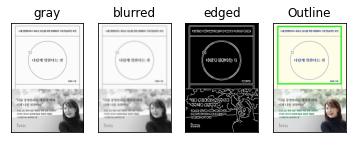

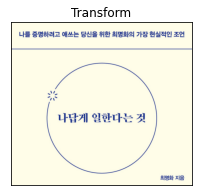

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...


['나답게 일한다는 것']

In [772]:
stopwords = ['옮김', '지음', '출판사', '@', '$', 'Book plaza(북플라자)','Giant Books(자이언트북스)','Page2(페이지2북스)', 'Snowfox(스노우폭스북스)',
            'Tornado(토네이도)','곰출판','길벗스쿨','김영사','나무옆의자','난다','다산북스','다산어린이','단꿈아이',
            '대성','디플롯','마음산책','문학동네','문학사상','미래엔','미래엔아이세움','민음인','바이포엠','바이포엠 스튜디오','밝은세상',
            '복복서가','북뱅크','북이십일','비룡소','비즈니스북스','사계절(사계절출판사)','서삼독','슈크림북','아울북','아이세움','아이휴먼',
            '아작','어크로스(어크로스출판그룹)','열림원','우리학교','웅진씽크빅','위즈덤하우스 미디어그룹','유노북스','은행나무','인플루엔셜',
            '재인','주니어김영사','창비','클레이하우스','토토북','팩토리나인','한경BP','허블','현대문학','휴먼큐브', '[-=+,#/\:^$@*\"※~&%ㆍ』\\‘|\(\)\[\]\<\>`\'…》]', '조언', '추천']

# url = 'http://image.yes24.com/goods/96674785/XL'
# image_nparray =  np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)

url = r'C:\Users\jinhee\project_readvice\readvice_easyOCR\data\images\1 (219).jpg'
org_image = cv2.imread(url, cv2.IMREAD_COLOR) 
# plt_imshow("orignal image", org_image)
book_image = make_scan_image(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)
langs = ['ko', 'en']
print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(book_image)
# results

simple_results = reader.readtext(book_image, detail = 0)
new_simple_results = []
for i in range(len(simple_results)):
    re.sub('[\/:*?"<>|]','', simple_results[i])
    new_simple_results.append(simple_results[i])

for word in new_simple_results:
    for i in stopwords:
        if i in word: 
            new_simple_results.remove(word)

new_simple_results

In [773]:
# simple_results = reader.readtext(book_image, detail = 0)
# simple_results